# Question 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create the dataset from the given table
data = {
    'Vehicle': range(1, 21),
    'Engine_Size': [1.6, 2.0, 2.4, 1.8, 2.2, 3.0, 2.0, 1.5, 2.5, 3.2, 1.4, 2.1, 3.5, 1.6, 2.3, 2.8, 2.6, 1.3, 3.1, 1.7],
    'Weight': [1200, 1300, 1500, 1250, 1400, 1600, 1350, 1100, 1550, 1650, 1050, 1380, 1700, 1150, 1450, 1580, 1520, 1020, 1620, 1180],
    'Horsepower': [110, 130, 150, 115, 140, 180, 135, 105, 160, 190, 100, 138, 200, 108, 145, 170, 155, 98, 185, 112],
    'MPG': [34, 30, 27, 32, 28, 22, 29, 36, 25, 20, 38, 28, 18, 35, 26, 23, 24, 39, 21, 33]
}

df = pd.DataFrame(data)

# Print the first few rows to verify the data
print("Dataset Preview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Preview:
   Vehicle  Engine_Size  Weight  Horsepower  MPG
0        1          1.6    1200         110   34
1        2          2.0    1300         130   30
2        3          2.4    1500         150   27
3        4          1.8    1250         115   32
4        5          2.2    1400         140   28

Summary Statistics:
        Vehicle  Engine_Size       Weight  Horsepower        MPG
count  20.00000    20.000000    20.000000    20.00000  20.000000
mean   10.50000     2.230000  1377.500000   141.30000  28.400000
std     5.91608     0.646529   212.228154    31.94749   6.142175
min     1.00000     1.300000  1020.000000    98.00000  18.000000
25%     5.75000     1.675000  1195.000000   111.50000  23.750000
50%    10.50000     2.150000  1390.000000   139.00000  28.000000
75%    15.25000     2.650000  1557.500000   162.50000  33.250000
max    20.00000     3.500000  1700.000000   200.00000  39.000000


In [3]:
# (a) Fit a multiple linear regression model using statsmodels
X = df[['Engine_Size', 'Weight', 'Horsepower']]
y = df['MPG']
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_const).fit()

In [4]:
# Display the model summary
print("\nModel Summary:")
print(model.summary())

# Extract coefficients and intercept
intercept = model.params[0]
coef_engine = model.params[1]
coef_weight = model.params[2]
coef_hp = model.params[3]

# (b) Write the regression equation
print("\nRegression Equation:")
print(f"MPG = {intercept:.4f} + ({coef_engine:.4f} × Engine_Size) + ({coef_weight:.4f} × Weight) + ({coef_hp:.4f} × Horsepower)")

# (c) Report coefficients, p-values, and R-squared
print("\nCoefficients and Intercept:")
print(f"Intercept: {intercept:.4f}")
print(f"Engine Size coefficient: {coef_engine:.4f}")
print(f"Weight coefficient: {coef_weight:.4f}")
print(f"Horsepower coefficient: {coef_hp:.4f}")

print("\nP-values:")
print(f"Engine Size p-value: {model.pvalues[1]:.4f}")
print(f"Weight p-value: {model.pvalues[2]:.4f}")
print(f"Horsepower p-value: {model.pvalues[3]:.4f}")

print(f"\nR-squared value: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     548.9
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           2.44e-16
Time:                        20:44:27   Log-Likelihood:                -17.733
No. Observations:                  20   AIC:                             43.47
Df Residuals:                      16   BIC:                             47.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          61.0782      2.372 

<ipython-input-4-9716bcf2a853>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
<ipython-input-4-9716bcf2a853>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_engine = model.params[1]
<ipython-input-4-9716bcf2a853>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_weight = model.params[2]
<ipython-input-4-9716bcf2a853>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

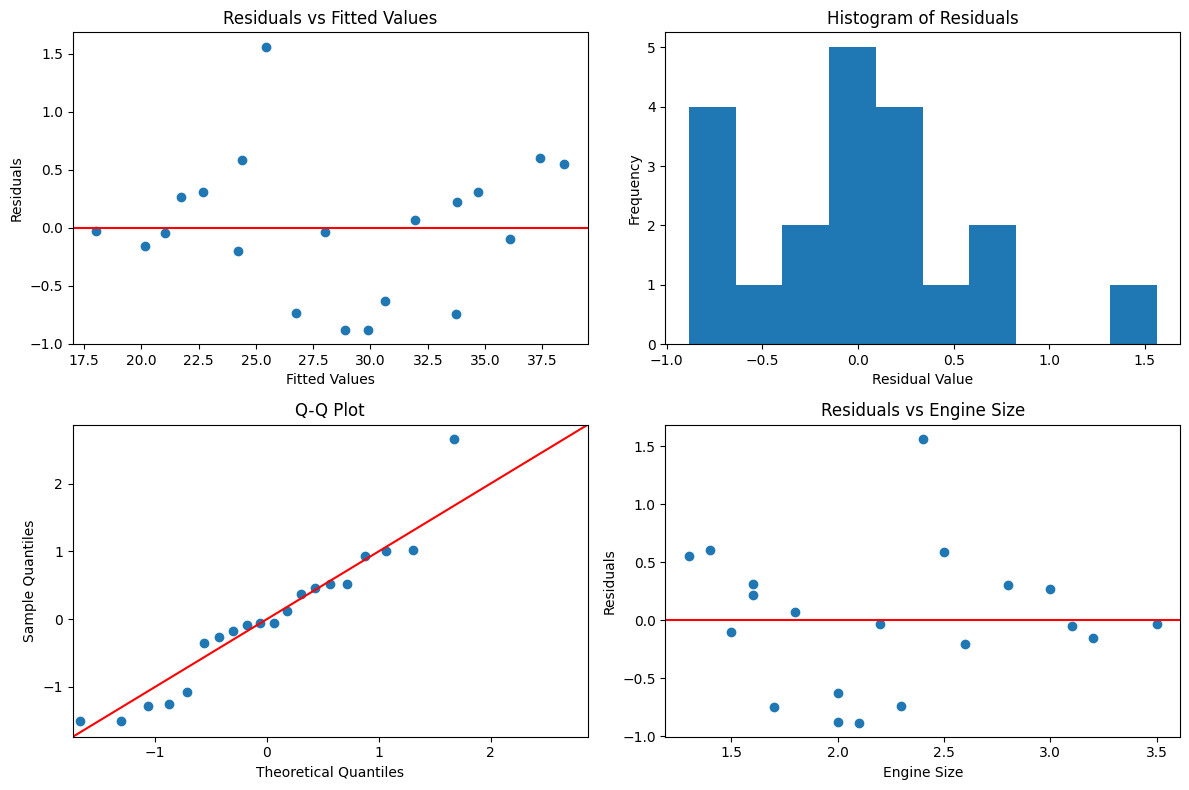

In [5]:
# Calculate residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Create residual plots
plt.figure(figsize=(12, 8))

# Residuals vs Fitted Values
plt.subplot(2, 2, 1)
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(2, 2, 2)
plt.hist(residuals, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

# QQ Plot
plt.subplot(2, 2, 3)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot')

# Residuals vs predictor variables
plt.subplot(2, 2, 4)
plt.scatter(df['Engine_Size'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [6]:
# (c) Conduct hypothesis tests for each predictor
print("\nHypothesis Tests for Predictors:")
print("H0: Coefficient = 0 (No effect on MPG)")
print("H1: Coefficient ≠ 0 (Significant effect on MPG)")

print("\nEngine Size:")
print(f"t-statistic: {model.tvalues[1]:.4f}")
print(f"p-value: {model.pvalues[1]:.4f}")

print("\nWeight:")
print(f"t-statistic: {model.tvalues[2]:.4f}")
print(f"p-value: {model.pvalues[2]:.4f}")

print("\nHorsepower:")
print(f"t-statistic: {model.tvalues[3]:.4f}")
print(f"p-value: {model.pvalues[3]:.4f}")

# (d) Show results for different levels of significance
significance_levels = [0.01, 0.05, 0.1]
p_values = model.pvalues[1:]  # Exclude the intercept p-value
predictors = ['Engine Size', 'Weight', 'Horsepower']

print("\nSignificance Tests at Different Levels:")
for alpha in significance_levels:
    print(f"\nAt significance level α = {alpha}:")
    for predictor, p_val in zip(predictors, p_values):
        if p_val < alpha:
            print(f"  {predictor}: p-value = {p_val:.4f} < {alpha} - Statistically significant")
        else:
            print(f"  {predictor}: p-value = {p_val:.4f} >= {alpha} - Not statistically significant")


Hypothesis Tests for Predictors:
H0: Coefficient = 0 (No effect on MPG)
H1: Coefficient ≠ 0 (Significant effect on MPG)

Engine Size:
t-statistic: -2.0781
p-value: 0.0542

Weight:
t-statistic: -5.8869
p-value: 0.0000

Horsepower:
t-statistic: 0.9351
p-value: 0.3637

Significance Tests at Different Levels:

At significance level α = 0.01:
  Engine Size: p-value = 0.0542 >= 0.01 - Not statistically significant
  Weight: p-value = 0.0000 < 0.01 - Statistically significant
  Horsepower: p-value = 0.3637 >= 0.01 - Not statistically significant

At significance level α = 0.05:
  Engine Size: p-value = 0.0542 >= 0.05 - Not statistically significant
  Weight: p-value = 0.0000 < 0.05 - Statistically significant
  Horsepower: p-value = 0.3637 >= 0.05 - Not statistically significant

At significance level α = 0.1:
  Engine Size: p-value = 0.0542 < 0.1 - Statistically significant
  Weight: p-value = 0.0000 < 0.1 - Statistically significant
  Horsepower: p-value = 0.3637 >= 0.1 - Not statistically

<ipython-input-6-486ed25298d7>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"t-statistic: {model.tvalues[1]:.4f}")
<ipython-input-6-486ed25298d7>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value: {model.pvalues[1]:.4f}")
<ipython-input-6-486ed25298d7>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"t-statistic: {model.tvalues[2]:.4f}")
<ipython-input-6-486ed25298d7>:12: FutureWarning: Series.__ge

In [7]:
# (e) Identify significant predictors and interpret
print("\nInterpretation of Regression Results:")
print("1. Coefficients:")
print(f"   - Engine Size: {coef_engine:.4f} - For each 1L increase in engine size, MPG decreases by {abs(coef_engine):.4f} units, holding other variables constant.")
print(f"   - Weight: {coef_weight:.4f} - For each 1kg increase in weight, MPG decreases by {abs(coef_weight):.4f} units, holding other variables constant.")
print(f"   - Horsepower: {coef_hp:.4f} - For each 1 unit increase in horsepower, MPG decreases by {abs(coef_hp):.4f} units, holding other variables constant.")
print(f"2. R-squared: {model.rsquared:.4f} - The model explains {model.rsquared*100:.2f}% of the variation in MPG.")

# Check for multicollinearity
print("\nMulticollinearity Check (VIF):")
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Final determination of significant predictors
print("\nFinal Determination of Significant Predictors (at α = 0.05):")
for predictor, p_val in zip(predictors, p_values):
    if p_val < 0.05:
        print(f"  {predictor} is a statistically significant predictor of MPG (p-value = {p_val:.4f})")
    else:
        print(f"  {predictor} is not a statistically significant predictor of MPG (p-value = {p_val:.4f})")


Interpretation of Regression Results:
1. Coefficients:
   - Engine Size: -5.4978 - For each 1L increase in engine size, MPG decreases by 5.4978 units, holding other variables constant.
   - Weight: -0.0204 - For each 1kg increase in weight, MPG decreases by 0.0204 units, holding other variables constant.
   - Horsepower: 0.0545 - For each 1 unit increase in horsepower, MPG decreases by 0.0545 units, holding other variables constant.
2. R-squared: 0.9904 - The model explains 99.04% of the variation in MPG.

Multicollinearity Check (VIF):
      Variable          VIF
0  Engine_Size   928.062096
1       Weight   604.243630
2   Horsepower  2792.217091

Final Determination of Significant Predictors (at α = 0.05):
  Engine Size is not a statistically significant predictor of MPG (p-value = 0.0542)
  Weight is a statistically significant predictor of MPG (p-value = 0.0000)
  Horsepower is not a statistically significant predictor of MPG (p-value = 0.3637)


# Question 2

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Create the dataset from the given table
data = {
    'Father_Height': [60, 62, 64, 65, 66, 67, 68, 70, 72, 74],
    'Mother_Height': [61, 63, 63, 64, 65, 66, 66, 67, 68, 69],
    'Son_Height': [63.6, 65.2, 66.0, 65.5, 66.9, 67.1, 67.4, 68.3, 70.1, 70.0]
}

df = pd.DataFrame(data)

# Print the dataset
print("Dataset Preview:")
print(df)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Calculate mean heights
mean_father = df['Father_Height'].mean()
mean_mother = df['Mother_Height'].mean()
mean_son = df['Son_Height'].mean()

print(f"\nMean Heights:")
print(f"Father's Mean Height: {mean_father:.2f} inches")
print(f"Mother's Mean Height: {mean_mother:.2f} inches")
print(f"Son's Mean Height: {mean_son:.2f} inches")

Dataset Preview:
   Father_Height  Mother_Height  Son_Height
0             60             61        63.6
1             62             63        65.2
2             64             63        66.0
3             65             64        65.5
4             66             65        66.9
5             67             66        67.1
6             68             66        67.4
7             70             67        68.3
8             72             68        70.1
9             74             69        70.0

Summary Statistics:
       Father_Height  Mother_Height  Son_Height
count      10.000000      10.000000   10.000000
mean       66.800000      65.200000   67.010000
std         4.366539       2.485514    2.069058
min        60.000000      61.000000   63.600000
25%        64.250000      63.250000   65.625000
50%        66.500000      65.500000   67.000000
75%        69.500000      66.750000   68.075000
max        74.000000      69.000000   70.100000

Mean Heights:
Father's Mean Height: 66.80 inc

In [9]:
# (a) Fit a multiple linear regression model
X = df[['Father_Height', 'Mother_Height']]
y = df['Son_Height']
X_with_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_with_const).fit()

# Display the model summary
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:             Son_Height   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     90.60
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           9.93e-06
Time:                        21:06:24   Log-Likelihood:                -4.4758
No. Observations:                  10   AIC:                             14.95
Df Residuals:                       7   BIC:                             15.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.3171     1

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [10]:
# Extract coefficients and intercept
intercept = model.params[0]
coef_father = model.params[1]
coef_mother = model.params[2]

# (b) Interpret the regression coefficients
print("\nRegression Equation:")
print(f"Son's Height = {intercept:.4f} + {coef_father:.4f} × Father's Height + {coef_mother:.4f} × Mother's Height")

print("\nInterpretation of Regression Coefficients:")
print(f"1. Intercept ({intercept:.4f}): The expected height of a son when both parents have zero height (not meaningful in this context).")
print(f"2. Father's Height Coefficient ({coef_father:.4f}): For each additional inch in father's height, the son's height increases by {coef_father:.4f} inches, holding mother's height constant.")
print(f"3. Mother's Height Coefficient ({coef_mother:.4f}): For each additional inch in mother's height, the son's height increases by {coef_mother:.4f} inches, holding father's height constant.")
print(f"\nThe R-squared value is {model.rsquared:.4f}, indicating that {model.rsquared*100:.2f}% of the variation in son's height is explained by the parents' heights.")


Regression Equation:
Son's Height = 30.3171 + 0.3497 × Father's Height + 0.2045 × Mother's Height

Interpretation of Regression Coefficients:
1. Intercept (30.3171): The expected height of a son when both parents have zero height (not meaningful in this context).
2. Father's Height Coefficient (0.3497): For each additional inch in father's height, the son's height increases by 0.3497 inches, holding mother's height constant.
3. Mother's Height Coefficient (0.2045): For each additional inch in mother's height, the son's height increases by 0.2045 inches, holding father's height constant.

The R-squared value is 0.9628, indicating that 96.28% of the variation in son's height is explained by the parents' heights.


<ipython-input-10-7fe2994eef9a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
<ipython-input-10-7fe2994eef9a>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_father = model.params[1]
<ipython-input-10-7fe2994eef9a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_mother = model.params[2]


In [11]:
# (c) Test for regression toward the mean (coefficients < 1)
print("\nTest for Regression Toward the Mean:")
print("H0: Coefficient = 1 (No regression toward the mean)")
print("H1: Coefficient < 1 (Evidence of regression toward the mean)")

# For Father's Height
t_stat_father = (coef_father - 1) / model.bse[1]
p_value_father = stats.t.cdf(t_stat_father, df=model.df_resid)
print(f"\nFather's Height:")
print(f"Coefficient: {coef_father:.4f}")
print(f"Standard Error: {model.bse[1]:.4f}")
print(f"t-statistic (for H1: coef < 1): {t_stat_father:.4f}")
print(f"p-value: {p_value_father:.4f}")
if p_value_father < 0.05:
    print("Conclusion: Reject H0. There is evidence that father's height coefficient is less than 1, supporting regression toward the mean.")
else:
    print("Conclusion: Cannot reject H0. Insufficient evidence that father's height coefficient is less than 1.")

# For Mother's Height
t_stat_mother = (coef_mother - 1) / model.bse[2]
p_value_mother = stats.t.cdf(t_stat_mother, df=model.df_resid)
print(f"\nMother's Height:")
print(f"Coefficient: {coef_mother:.4f}")
print(f"Standard Error: {model.bse[2]:.4f}")
print(f"t-statistic (for H1: coef < 1): {t_stat_mother:.4f}")
print(f"p-value: {p_value_mother:.4f}")
if p_value_mother < 0.05:
    print("Conclusion: Reject H0. There is evidence that mother's height coefficient is less than 1, supporting regression toward the mean.")
else:
    print("Conclusion: Cannot reject H0. Insufficient evidence that mother's height coefficient is less than 1.")

# Test for the sum of coefficients
sum_coef = coef_father + coef_mother
print(f"\nSum of parent coefficients: {sum_coef:.4f}")
if sum_coef < 1:
    print("The sum of coefficients is less than 1, which may suggest regression toward the mean in combined parental influence.")
else:
    print("The sum of coefficients is not less than 1.")


Test for Regression Toward the Mean:
H0: Coefficient = 1 (No regression toward the mean)
H1: Coefficient < 1 (Evidence of regression toward the mean)

Father's Height:
Coefficient: 0.3497
Standard Error: 0.2142
t-statistic (for H1: coef < 1): -3.0355
p-value: 0.0095
Conclusion: Reject H0. There is evidence that father's height coefficient is less than 1, supporting regression toward the mean.

Mother's Height:
Coefficient: 0.2045
Standard Error: 0.3764
t-statistic (for H1: coef < 1): -2.1135
p-value: 0.0362
Conclusion: Reject H0. There is evidence that mother's height coefficient is less than 1, supporting regression toward the mean.

Sum of parent coefficients: 0.5542
The sum of coefficients is less than 1, which may suggest regression toward the mean in combined parental influence.


<ipython-input-11-fc82592364a6>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat_father = (coef_father - 1) / model.bse[1]
<ipython-input-11-fc82592364a6>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Standard Error: {model.bse[1]:.4f}")
<ipython-input-11-fc82592364a6>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t_stat_mother = (coef_mother - 1) / model.bse[2]
<ipython-input-11-fc82592364a6>:24: FutureWarnin

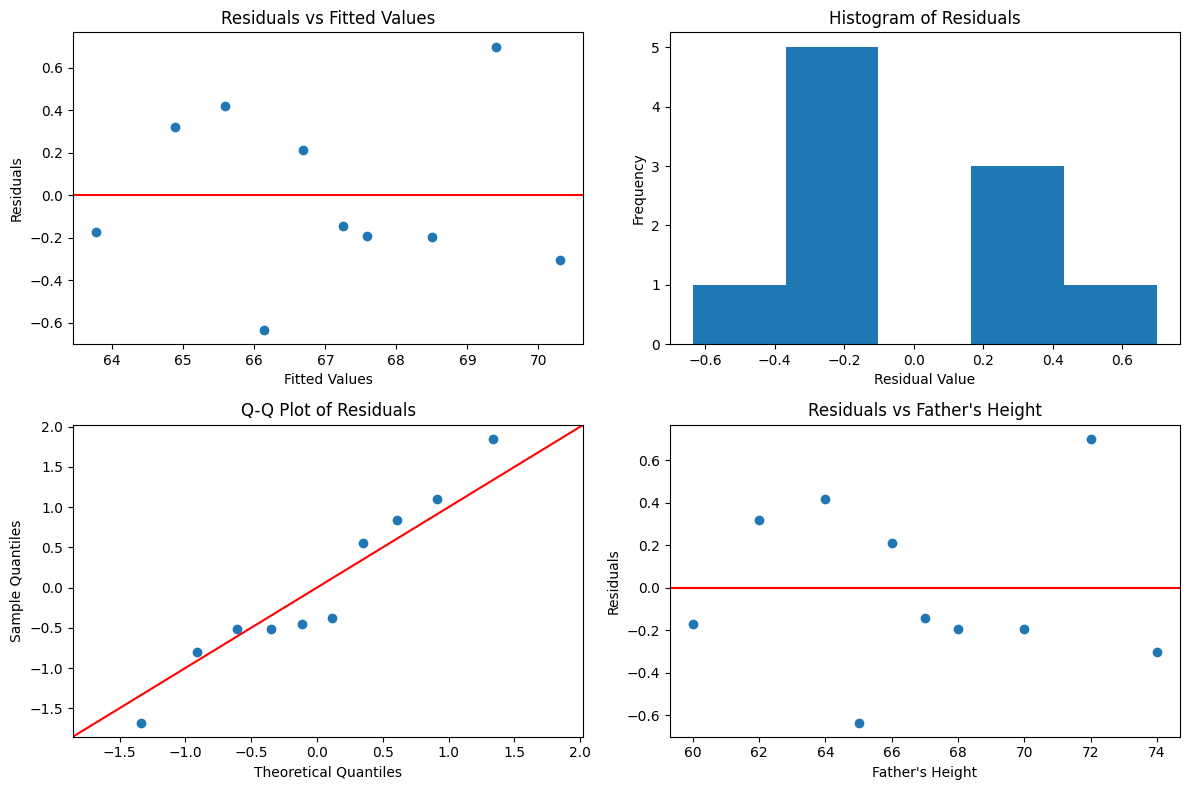

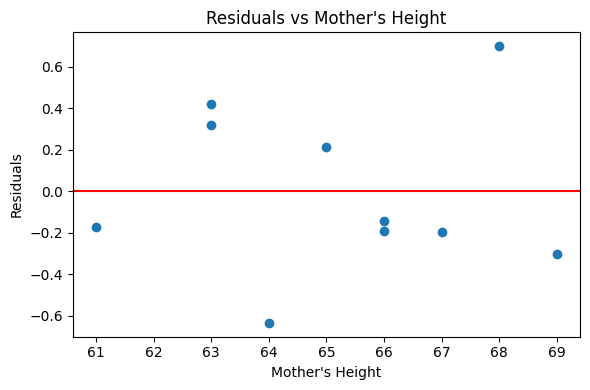

In [12]:
# (d) Plot residual values
residuals = model.resid
fitted_values = model.fittedvalues

# Create residual plots
plt.figure(figsize=(12, 8))

# Residuals vs Fitted Values
plt.subplot(2, 2, 1)
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(2, 2, 2)
plt.hist(residuals, bins=5)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

# QQ Plot
plt.subplot(2, 2, 3)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

# Residuals vs Father's Height
plt.subplot(2, 2, 4)
plt.scatter(df['Father_Height'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Father\'s Height')
plt.xlabel('Father\'s Height')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Additional plot: Residuals vs Mother's Height
plt.figure(figsize=(6, 4))
plt.scatter(df['Mother_Height'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs Mother\'s Height')
plt.xlabel('Mother\'s Height')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [13]:
# (e) Comment on the implications of results
print("\nImplications of the Results:")
print(f"1. Model Fit: The R-squared value of {model.rsquared:.4f} indicates that {model.rsquared*100:.2f}% of the variation in son's height can be explained by parents' heights.")

print("\n2. Parental Influence:")
print(f"   - Father's contribution: {coef_father:.4f}")
print(f"   - Mother's contribution: {coef_mother:.4f}")
if coef_father > coef_mother:
    print("   - The father's height appears to have a stronger influence on the son's height than the mother's height.")
elif coef_mother > coef_father:
    print("   - The mother's height appears to have a stronger influence on the son's height than the father's height.")
else:
    print("   - Both parents appear to have equal influence on the son's height.")

print("\n3. Regression Toward the Mean:")
if p_value_father < 0.05 and p_value_mother < 0.05:
    print("   - Strong evidence of regression toward the mean from both parents.")
elif p_value_father < 0.05:
    print("   - Evidence of regression toward the mean from the father's side.")
elif p_value_mother < 0.05:
    print("   - Evidence of regression toward the mean from the mother's side.")
else:
    print("   - Limited evidence of regression toward the mean in this dataset.")

print("\n4. Biological and Environmental Factors:")
print("   - Coefficients less than 1 suggest genetic and environmental factors causing height to revert toward population mean.")
print("   - This aligns with the principle that extreme traits in parents tend to be less extreme in offspring.")

print("\n5. Limitations:")
print("   - Small sample size (n=10) limits statistical power and generalizability.")
print("   - Model does not account for other genetic or environmental factors affecting height.")
print("   - The analysis doesn't consider gender differences or other family members' heights.")

print("\n6. Practical Implications:")
print("   - Results can inform genetic counseling and height prediction models.")
print("   - Understanding regression toward the mean helps set realistic expectations about children's height.")


Implications of the Results:
1. Model Fit: The R-squared value of 0.9628 indicates that 96.28% of the variation in son's height can be explained by parents' heights.

2. Parental Influence:
   - Father's contribution: 0.3497
   - Mother's contribution: 0.2045
   - The father's height appears to have a stronger influence on the son's height than the mother's height.

3. Regression Toward the Mean:
   - Strong evidence of regression toward the mean from both parents.

4. Biological and Environmental Factors:
   - Coefficients less than 1 suggest genetic and environmental factors causing height to revert toward population mean.
   - This aligns with the principle that extreme traits in parents tend to be less extreme in offspring.

5. Limitations:
   - Small sample size (n=10) limits statistical power and generalizability.
   - Model does not account for other genetic or environmental factors affecting height.
   - The analysis doesn't consider gender differences or other family members'